# MODELO CLASIFICACION REGRESION LOGISTICA

Presentamos e Importamos todas las librerias que vamos a necesitar a lo largo del modelo.

In [56]:
import pandas as pd
import numpy as np

#Libreria Metricas
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

#Librerias Visualizacion
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns 
from pylab import rcParams 
from matplotlib import pyplot

#Librerias Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from collections import Counter
from imblearn.over_sampling import SMOTE 



Leemos y presentamos nuestra Base de Datos. Mostramos las 5 primeras filas, el tipo y el nombre de las Columnas / variables que la componen. Las variables que se refierne a unidades de negocio no las vamos a utilizar en el modelo por lo que las transformamos a Objeto para un mejor entendimiento y segmentacion de las propias variables. 

In [2]:
df = pd.read_csv('/home/dsc/Master-Kschool/TFM/Financial-Product-Sales-Forecast-Model/0rigin_data/cleanned_data/df.tfm')

In [3]:
# Transformamos variables unidad de negocio en object ya que no queremos utilizarlas.
df[["cliente", "gestor",
    'codigo_cartera', 'dz', 'oficina']] = df[["cliente", "gestor",
                                              'codigo_cartera', 'dz', 'oficina']].astype(object);

In [4]:
df.head(5)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,1,1328106.49,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,69.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,1,0
1,2,1142234.34,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,81.0,ALTO,ALTO RECORRIDO,2,210,0,0,0,0,0
2,3,1142234.34,SI,NO,ASESOR FINANCIERO,18287.0,TUTELA,28332.0,NO,SIN USO,...,75.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0
3,4,1340503.88,SI,NO,ASESOR FINANCIERO,41475.0,ASESORAMIENTO FINANCIERO,14204.0,NO,SIN USO,...,94.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0
4,5,1758517.70,SI,NO,ASESOR FINANCIERO,39000.0,ASESORAMIENTO FINANCIERO,14219.0,SI,COMPRADOR,...,64.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0


In [5]:
df.columns

Index(['cliente', 'saldo_captacion', 'esta_carterizado', 'cliente_bbp',
       'tipo_gestor', 'gestor', 'cartera_patron', 'codigo_cartera',
       'digital_3_meses', 'camino_digital', 'saldo_financiacion', 'saldo_ffii',
       'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos',
       'lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor',
       'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',
       'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto'],
      dtype='object')

## PRIMERA APROXIMACION AL MODELO

In [6]:
df = df.select_dtypes('number')

In [7]:
# Inputs y Target 
X = df.drop(['lp_seg_hogar'], axis = 1)
y= df['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 6319236 (451374, 14)
Datos y = 451374 (451374,)


In [8]:
# Instanciamos el clasificador
clf_log_regressor = LogisticRegression()

In [9]:
# Entrenamos el modelo
clf_log_regressor.fit(X,y)

LogisticRegression()

In [10]:
# Sacamos las primeras predicciones
clf_log_regressor.predict(X)

array([1, 1, 1, ..., 0, 0, 0])

In [11]:
# Dividimos nuestro DF en Set de Entrenamiento 80% y Set de Test 20%.  
test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [12]:
# Entrenamos el modelo
clf_log_regressor.fit(X_train,y_train)

LogisticRegression()

In [13]:
# Sacamos las primeras predicciones
clf_log_regressor.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
# Sacamos probabilidades de la opcion 1 "Tiene Seguro de Hogar"
clf_log_regressor.predict_proba(X_test)[:, 1]

array([0.31004564, 0.13072842, 0.17100719, ..., 0.07256822, 0.13290052,
       0.03860107])

Los resultados obtenidos en Train estan muy cercanos a los obtenidos en test. Nuestro modelo entrenado está generalizando bien y lo podemos dar por bueno por ahora a falta de conseguir mejores metricas. En caso de haber existido mucha diferencia podria estar indicando overfiting.

In [15]:
# Primeros restultados con metrica elegida "Recall" para ver si generaliza bien nuestro modelo.
recall_train_modelo_primera_aproximacion = recall_score(y_train,clf_log_regressor.predict(X_train))
recall_test_modelo_primera_aproximacion = recall_score(y_test,clf_log_regressor.predict(X_test))
print('recall_train_modelo_primera_aproximacion', recall_train_modelo_primera_aproximacion)
print('recall_test_modelo_primera_aproximacion =', recall_test_modelo_primera_aproximacion)

recall_train_modelo_primera_aproximacion 0.023710287925828265
recall_test_modelo_primera_aproximacion = 0.022571064913025032


In [16]:
# Resultados obtenidos del modelo.
print('== Primera Aproximacion CLR_model ==')
print ('accuracy_score =', accuracy_score(y_test,clf_log_regressor.predict(X_test)))
print('====================================')
print('precision  =', precision_score(y_test,clf_log_regressor.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,clf_log_regressor.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,clf_log_regressor.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,clf_log_regressor.predict_proba(X_test)[:, 1]))
print('====================================')
print('classification_report')
print(classification_report(y_test, clf_log_regressor.predict(X_test)))

== Primera Aproximacion CLR_model ==
accuracy_score = 0.8687565771254501
precision  = 0.4470588235294118
recall = 0.022571064913025032
f1_score = 0.042972536348949916
roc_auc_score = 0.4880382752670486
classification_report
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     78490
           1       0.45      0.02      0.04     11785

    accuracy                           0.87     90275
   macro avg       0.66      0.51      0.49     90275
weighted avg       0.82      0.87      0.81     90275



Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.488


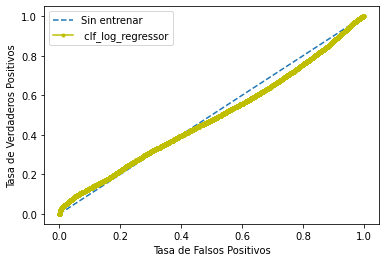

In [17]:
# Pintamos Curva Roc
# Generamos un clasificador sin entrenar , que asignará 0 a todo
sin_entrenar = [0 for _ in range(len(X_test))]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, sin_entrenar)
lr_auc = roc_auc_score(y_test, clf_log_regressor.predict_proba(X_test)[:, 1])
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, sin_entrenar)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clf_log_regressor.predict_proba(X_test)[:, 1])
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clf_log_regressor' , color = "y")
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

## MODELO

In [18]:
# Leemos la base de datos. 
# 1ª Base de datos con datos preprocesados
# 2ª Base de datos con datos preprocesados + reduccion de dimensionalidad PCA aplicada
df_normalizado = pd.read_csv('/home/dsc/Master-Kschool/TFM/Financial-Product-Sales-Forecast-Model/Preprocessing/df_normalizado.csv')
df_normalizado_pca = pd.read_csv('/home/dsc/Master-Kschool/TFM/Financial-Product-Sales-Forecast-Model/Preprocessing/df_normalizado_pca.csv')

In [19]:
# Inputs y Target Sin PCA
X = df_normalizado.drop(['lp_seg_hogar'], axis = 1)
y= df_normalizado['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 8774052 (417812, 21)
Datos y = 417812 (417812,)


In [20]:
# Inputs y Target Con PCA
X_pca = df_normalizado_pca.drop(['lp_seg_hogar'], axis = 1)
y_pca = df_normalizado_pca['lp_seg_hogar']
print('Datos X =', X_pca.size, X_pca.shape)
print('Datos y =', y_pca.size, y_pca.shape)

Datos X = 6267180 (417812, 15)
Datos y = 417812 (417812,)


## BALANCEO

Hemos visto en el estudio del Target que esta muy desbalanceado. Utilizaremos 3 distintas formulas para remediar este desbalanceo. Depues de entrenar las tres opciones Weigth balanced & Smote arrojan mejores resultados. NearMiss obtiene muy bajo resultado

- Penalización para compensar Weigth balanced
- NearMiss
- Smote

__1ª Estrategia: Penalización para compensar Weigth balanced__

In [21]:
# Solver elegido liblinear. 'newton-cg' no converge. 
clf_log_regressor = LogisticRegression(solver = 'liblinear', class_weight='balanced')
clf_log_regressor_pca = LogisticRegression(solver = 'liblinear', class_weight='balanced')

In [22]:
# Ajustamos nuestro set de entrenamiento y test Sin pca. (80-20)
test_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [23]:
# Ajustamos nuestro set de entrenamiento y test Con pca. (80-20)
test_size = 0.2
seed = 7
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y_pca, test_size = test_size, random_state = seed)

In [24]:
#  Entrenamos nuestro modelo Sin pca
clf_log_regressor.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [25]:
# Entrenamos nuestro modelo Con pca
clf_log_regressor_pca.fit(X_pca_train,y_pca_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [26]:
# Hacemos las primeras predicciones Sin pca
clf_log_regressor.predict(X_test)

array([1., 0., 0., ..., 0., 1., 0.])

In [27]:
# Hacemos las primeras predicciones Con pca
clf_log_regressor_pca.predict(X_pca_test)

array([1., 0., 0., ..., 0., 1., 0.])

In [28]:
# Sacamos probabilidades de la opcion 1 "Tiene Seguro de Hogar" Sin pca
clf_log_regressor.predict_proba(X_test)[:, 1]

array([0.52887499, 0.13417673, 0.03837261, ..., 0.27000934, 0.78067885,
       0.05125108])

In [29]:
# Sacamos probabilidades de la opcion 1 "Tiene Seguro de Hogar" Con pca
clf_log_regressor_pca.predict_proba(X_pca_test)[:, 1]

array([0.66074061, 0.12458009, 0.0535582 , ..., 0.35816357, 0.73997497,
       0.08920069])

__Confirmacion Primeros resultados__. Los resultados obtenidos en Train estan muy cercanos a los obtenidos en test. Nuestro modelo entrenado está generalizando bien y lo podemos dar por bueno por ahora a falta de conseguir mejores metricas. No hay overfiting.  Confirmamos que generaliza bien con Cross Validation sacando las medias de las distintas metricas.

In [30]:
# Primeros resultados. 
print('===========RECALL TRAIN============')
print('recall =', recall_score(y_train,clf_log_regressor.predict(X_train)))
print('===========RECALL TEST=============')
print('recall =', recall_score(y_test,clf_log_regressor.predict(X_test)))
print('===========RECALL TRAIN pca =======')
print('recall =', recall_score(y_pca_train,clf_log_regressor_pca.predict(X_pca_train)))
print('===========RECALL TEST pca ========')
print('recall =', recall_score(y_pca_test,clf_log_regressor_pca.predict(X_pca_test)))

===========RECALL TRAIN============
recall = 0.8816518968001048
===========RECALL TEST=============
recall = 0.8872939925571505
===========RECALL TRAIN pca =======
recall = 0.8931767581961846
===========RECALL TEST pca ========
recall = 0.8970405812511075


## Tecnicas Validacion Cruzada.  Metrics: Cross validation
Utilizamos Cross Validation para iterar con 'K_folds_veces' a lo largo del set de entrenamiento
- K_Fold utilizado 5 veces.

- Apartaremos 1/5 de muestras.
- Entrenamos al modelo con el restante 4/5 de muestras.
- Mediremos con distintas metricas el resultado obtenido sobre las muestras apartadas.
- Esto quiere decir que hacemos 5 entrenamientos independientes.
- Los resultados serán el promedio de las 5 accuracies anteriores.

In [31]:
kf = KFold(n_splits=5)

In [32]:
cross_val_score_precision = cross_val_score(clf_log_regressor,X,y,cv=kf,scoring="precision").mean()
cross_val_score_precision_pca = cross_val_score(clf_log_regressor_pca,X_pca,y_pca,cv=kf,scoring="precision").mean()
cross_val_score_recall = cross_val_score(clf_log_regressor,X,y,cv=kf,scoring="recall").mean()
cross_val_score_recall_pca = cross_val_score(clf_log_regressor_pca,X_pca,y_pca,cv=kf,scoring="recall").mean()
cross_val_score_f1 = cross_val_score(clf_log_regressor,X,y,cv=kf,scoring="f1").mean()
cross_val_score_f1_pca = cross_val_score(clf_log_regressor_pca,X_pca,y_pca,cv=kf,scoring="f1").mean()
print('Cross Validation sin pca: ', cross_val_score_precision , cross_val_score_recall, cross_val_score_f1)
print('Cross Validation con pca: ', cross_val_score_precision_pca , cross_val_score_recall_pca, cross_val_score_f1_pca)

Cross Validation sin pca:  0.2900211928316806 0.8809675046094296 0.43604890770240123
Cross Validation con pca:  0.2805903682705041 0.8918155870680009 0.4264801745994447


### Confussion Matrix

[[47617 24660]
 [ 1272 10014]]


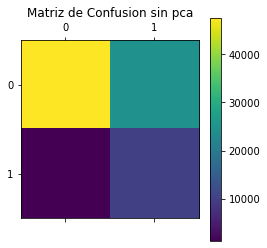

In [33]:
# Ploteamos la Confussion Matrix Sin pca
matriz_confusion_clf_log_regressor = confusion_matrix(y_test,clf_log_regressor.predict(X_test))
print(matriz_confusion_clf_log_regressor)
pl.matshow(confusion_matrix(y_test,clf_log_regressor.predict(X_test)))
pl.title('Matriz de Confusion sin pca')
pl.colorbar()
pl.show()

[[46081 26196]
 [ 1162 10124]]


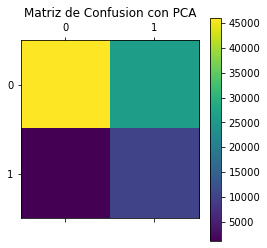

In [34]:
# Ploteamos la Confussion Matrix Con pca
matriz_confusion_clf_log_regressor_pca = confusion_matrix(y_pca_test,clf_log_regressor_pca.predict(X_pca_test))
print(matriz_confusion_clf_log_regressor_pca)
pl.matshow(confusion_matrix(y_pca_test,clf_log_regressor_pca.predict(X_pca_test)))
pl.title('Matriz de Confusion con PCA')
pl.colorbar()
pl.show()

### Resultados CLR Model

In [35]:
print('========== CLR_model ================')
print ('accuracy_score_sin_pca = ', accuracy_score(y_test,clf_log_regressor.predict(X_test)))
print ('accuracy_score_con_pca = ', accuracy_score(y_pca_test,clf_log_regressor_pca.predict(X_pca_test)))
print('====================================')
print('precision_sin_pca  =', precision_score(y_test,clf_log_regressor.predict(X_test)))
print('precision_con_pca  =', precision_score(y_pca_test,clf_log_regressor_pca.predict(X_pca_test)))
print('====================================')
print('recall_sin_pca  =', recall_score(y_test,clf_log_regressor.predict(X_test)))
print('recall_con_pca  =', recall_score(y_pca_test,clf_log_regressor_pca.predict(X_pca_test)))
print('====================================')
print('f1_score_sin_pca  =', f1_score(y_test,clf_log_regressor.predict(X_test)))
print('f1_score_con_pca  =', f1_score(y_pca_test,clf_log_regressor_pca.predict(X_pca_test)))
print('====================================')
print('roc_auc_score_sin_pca  =', roc_auc_score(y_test,clf_log_regressor.predict_proba(X_test)[:, 1]))
print('roc_auc_score_con_pca  =', roc_auc_score(y_pca_test,clf_log_regressor_pca.predict_proba(X_pca_test)[:, 1]))
print('====================================')
print('classification_report_sin_pca ')
print(classification_report(y_test, clf_log_regressor.predict(X_test)))
print('classification_report_con_pca ')
print(classification_report(y_pca_test, clf_log_regressor_pca.predict(X_pca_test)))

========== CLR_model ================
accuracy_score_sin_pca =  0.689671265990929
accuracy_score_con_pca =  0.672606297045343
precision_sin_pca  = 0.28880429139989616
precision_con_pca  = 0.27874449339207047
recall_sin_pca  = 0.8872939925571505
recall_con_pca  = 0.8970405812511075
f1_score_sin_pca  = 0.43577023498694517
f1_score_con_pca  = 0.42532453892366506
roc_auc_score_sin_pca  = 0.8351577016750766
roc_auc_score_con_pca  = 0.8193861341741608
classification_report_sin_pca 
              precision    recall  f1-score   support

         0.0       0.97      0.66      0.79     72277
         1.0       0.29      0.89      0.44     11286

    accuracy                           0.69     83563
   macro avg       0.63      0.77      0.61     83563
weighted avg       0.88      0.69      0.74     83563

classification_report_con_pca 
              precision    recall  f1-score   support

         0.0       0.98      0.64      0.77     72277
         1.0       0.28      0.90      0.43     1128

## Curva Roc Balanceado con class weigth

Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.835


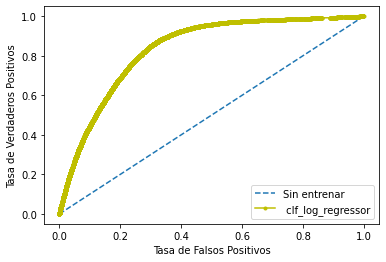

In [36]:
# Pintamos la Curva Roc SIN PCA que ha dado mejor resultado
#Generamos un clasificador sin entrenar , que asignará 0 a todo
sin_entrenar = [0 for _ in range(len(X_test))]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, sin_entrenar)
lr_auc = roc_auc_score(y_test, clf_log_regressor.predict_proba(X_test)[:, 1])
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, sin_entrenar)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clf_log_regressor.predict_proba(X_test)[:, 1])
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clf_log_regressor' , color = "y")
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

### 2ª Estrategia: Subsampling en la clase mayoritaria . ( Sin pca )
    - Con NearMiss
    
https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/

In [37]:
# Instanciamos clasificador 
clf_log_regressor = LogisticRegression(solver = 'liblinear')

In [38]:
# Entrenamos el modelo
clf_log_regressor.fit(X,y)

LogisticRegression(solver='liblinear')

In [39]:
# Sacmos las primeras predicciones
clf_log_regressor.predict(X)

array([0., 0., 0., ..., 0., 0., 0.])

In [40]:
# Balanceamos con NearMiss "
from imblearn.under_sampling import NearMiss
nr = NearMiss() 

In [41]:
# Ajustamos nuestro set de entrenamiento y test Sin pca. (80-20)
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train)  

In [42]:
# Ajustamos nuestro set de entrenamiento y test Con pca. (80-20)
X_train_miss_pca, y_train_miss_pca = nr.fit_sample(X_pca_train, y_pca_train)  

In [47]:
# Informacion de la distribucion de los datos antes y despues de balancear con Nearmiss
from collections import Counter
print ("Distribucion antes de NearMiss_sin_pca : {} ".format(Counter(y_train)))
print ("Distribucion antes de NearMiss_con_pca : {} ".format(Counter(y_pca_train)))
print('====================================')
print ("Distribucion despues de NearMiss_sin_pca : {} ".format(Counter(y_train_miss)))
print ("Distribucion despues de NearMiss_con_pca : {} ".format(Counter(y_train_miss_pca)))

Distribucion antes de NearMiss_sin_pca : Counter({0.0: 288435, 1.0: 45814}) 
Distribucion antes de NearMiss_con_pca : Counter({0.0: 288435, 1.0: 45814}) 
Distribucion despues de NearMiss_sin_pca : Counter({0.0: 45814, 1.0: 45814}) 
Distribucion despues de NearMiss_con_pca : Counter({0.0: 45814, 1.0: 45814}) 


In [48]:
# Entrenamos nuestro modelo Sin pca
clf_log_regressor.fit(X_train_miss, y_train_miss) 

LogisticRegression(solver='liblinear')

In [49]:
# Entrenamos nuestro modelo Con pca
clf_log_regressor_pca.fit(X_train_miss_pca, y_train_miss_pca) 

LogisticRegression(class_weight='balanced', solver='liblinear')

In [50]:
# Sacmos predicciones Sin pca
clf_log_regressor.predict(X_test)

array([1., 0., 0., ..., 1., 1., 0.])

In [51]:
# Sacamos predicciones Con pca
clf_log_regressor_pca.predict(X_pca_test)

array([1., 0., 0., ..., 1., 1., 0.])

In [52]:
# Sacamos probabilidades Sin pca
clf_log_regressor.predict_proba(X_test)[:, 1]

array([0.80810328, 0.09191923, 0.12204719, ..., 0.55433404, 0.86160216,
       0.27501322])

In [53]:
# Sacamos probabilidades Con pca
clf_log_regressor_pca.predict_proba(X_pca_test)[:, 1]

array([0.71938676, 0.10155686, 0.12704378, ..., 0.73189927, 0.5906215 ,
       0.22951338])

## Curva Roc Balanceado con Nearmiss

In [54]:
print('=== RESULTADOS CON NEARMISS ========')
print ('accuracy_score_sin_pca = ', accuracy_score(y_test,clf_log_regressor.predict(X_test)))
print ('accuracy_score_con_pca = ', accuracy_score(y_pca_test,clf_log_regressor_pca.predict(X_pca_test)))
print('====================================')
print('precision_sin_pca  =', precision_score(y_test,clf_log_regressor.predict(X_test)))
print('precision_covalidationnn_pca  =', precision_score(y_pca_test,clf_log_regressor_pca.predict(X_pca_test)))
print('====================================')
print('recall_sin_pca  =', recall_score(y_test,clf_log_regressor.predict(X_test)))
print('recall_con_pca  =', recall_score(y_pca_test,clf_log_regressor_pca.predict(X_pca_test)))
print('====================================')
print('f1_score_sin_pca  =', f1_score(y_test,clf_log_regressor.predict(X_test)))
print('f1_score_con_pca  =', f1_score(y_pca_test,clf_log_regressor_pca.predict(X_pca_test)))
print('====================================')
print('roc_auc_score_sin_pca  =', roc_auc_score(y_test,clf_log_regressor.predict_proba(X_test)[:, 1]))
print('roc_auc_score_con_pca  =', roc_auc_score(y_pca_test,clf_log_regressor_pca.predict_proba(X_pca_test)[:, 1]))
print('====================================')
print('classification_report_sin_pca ')
print(classification_report(y_test, clf_log_regressor.predict(X_test)))
print('classification_report_con_pca ')
print(classification_report(y_pca_test, clf_log_regressor_pca.predict(X_pca_test)))

=== RESULTADOS CON NEARMISS ========
accuracy_score_sin_pca =  0.5822912054378134
accuracy_score_con_pca =  0.513492813805153
precision_sin_pca  = 0.18972176243398756
precision_covalidationnn_pca  = 0.1617369269753513
recall_sin_pca  = 0.639819245082403
recall_con_pca  = 0.6220981747297537
f1_score_sin_pca  = 0.292662167912943
f1_score_con_pca  = 0.25672809711861927
roc_auc_score_sin_pca  = 0.6447382016433612
roc_auc_score_con_pca  = 0.5706761451995614
classification_report_sin_pca 
              precision    recall  f1-score   support

         0.0       0.91      0.57      0.70     72277
         1.0       0.19      0.64      0.29     11286

    accuracy                           0.58     83563
   macro avg       0.55      0.61      0.50     83563
weighted avg       0.81      0.58      0.65     83563

classification_report_con_pca 
              precision    recall  f1-score   support

         0.0       0.89      0.50      0.64     72277
         1.0       0.16      0.62      0.26  

## Curva Roc Balanceado con Nearmiss

Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.645


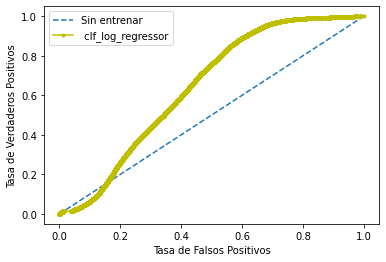

In [55]:
#Generamos un clasificador sin entrenar , que asignará 0 a todo
sin_entrenar = [0 for _ in range(len(X_test))]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, sin_entrenar)
lr_auc = roc_auc_score(y_test, clf_log_regressor.predict_proba(X_test)[:, 1])
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, sin_entrenar)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clf_log_regressor.predict_proba(X_test)[:, 1])
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clf_log_regressor' , color = "y")
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

### 2ª Estrategia: Subsampling en la clase mayoritaria 
      - Con Smote

In [57]:
# Balanceamos con Smote 
sm = SMOTE(random_state = 2) 

In [58]:
#clf_log_regressor = LogisticRegression(solver = 'liblinear')

In [ ]:
#clf_log_regressor.fit(X,y)

In [ ]:
#clf_log_regressor.predict(X)

In [59]:
# Entrenamos nuestro modelo Sin pca
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train) 

In [60]:
# Entrenamos nuestro modelo Con pca
X_train_smote_pca, y_train_smote_pca = nr.fit_sample(X_pca_train, y_pca_train)  

In [61]:
# Informacion de la distribucion de los datos antes y despues de balancear con Smote
print ("Distribucion antes de Smote_sin_pca : {} ".format(Counter(y_train)))
print ("Distribucion antes de Smote_con_pca : {} ".format(Counter(y_pca_train)))
print('====================================')
print ("Distribucion despues de Smote_sin_pca : {} ".format(Counter(y_train_smote)))
print ("Distribucion despues de NSmote_con_pca : {} ".format(Counter(y_train_smote_pca)))

Distribucion antes de Smote_sin_pca : Counter({0.0: 288435, 1.0: 45814}) 
Distribucion antes de Smote_con_pca : Counter({0.0: 288435, 1.0: 45814}) 
Distribucion despues de Smote_sin_pca : Counter({0.0: 288435, 1.0: 288435}) 
Distribucion despues de NSmote_con_pca : Counter({0.0: 45814, 1.0: 45814}) 


In [62]:
# Entrenamos nuestro modelo Sin pca
clf_log_regressor.fit(X_train_smote, y_train_smote) 

LogisticRegression(solver='liblinear')

In [63]:
# Entrenamos nuestro modelo Con pca
clf_log_regressor_pca.fit(X_train_smote_pca, y_train_smote_pca) 

LogisticRegression(class_weight='balanced', solver='liblinear')

In [64]:
# Sacamos predicciones Sin pca
clf_log_regressor.predict(X_test)

array([1., 0., 0., ..., 0., 1., 0.])

In [65]:
# Sacamos predicciones Con pca
clf_log_regressor_pca.predict(X_pca_test)

array([1., 0., 0., ..., 1., 1., 0.])

In [66]:
# Sacamos probabiliades sin pca
clf_log_regressor.predict_proba(X_test)[:, 1]

array([0.51798905, 0.13288562, 0.03682501, ..., 0.26725688, 0.78997374,
       0.04880798])

In [67]:
# Sacamos probabiliades Con pca
clf_log_regressor_pca.predict_proba(X_pca_test)[:, 1]

array([0.71938676, 0.10155686, 0.12704378, ..., 0.73189927, 0.5906215 ,
       0.22951338])

In [68]:
print('=== RESULTADOS CON SMOTE ========')
print ('accuracy_score_sin_pca = ', accuracy_score(y_test,clf_log_regressor.predict(X_test)))
print ('accuracy_score_con_pca = ', accuracy_score(y_pca_test,clf_log_regressor_pca.predict(X_pca_test)))
print('====================================')
print('precision_sin_pca  =', precision_score(y_test,clf_log_regressor.predict(X_test)))
print('precision_covalidationnn_pca  =', precision_score(y_pca_test,clf_log_regressor_pca.predict(X_pca_test)))
print('====================================')
print('recall_sin_pca  =', recall_score(y_test,clf_log_regressor.predict(X_test)))
print('recall_con_pca  =', recall_score(y_pca_test,clf_log_regressor_pca.predict(X_pca_test)))
print('====================================')
print('f1_score_sin_pca  =', f1_score(y_test,clf_log_regressor.predict(X_test)))
print('f1_score_con_pca  =', f1_score(y_pca_test,clf_log_regressor_pca.predict(X_pca_test)))
print('====================================')
print('roc_auc_score_sin_pca  =', roc_auc_score(y_test,clf_log_regressor.predict_proba(X_test)[:, 1]))
print('roc_auc_score_con_pca  =', roc_auc_score(y_pca_test,clf_log_regressor_pca.predict_proba(X_pca_test)[:, 1]))
print('====================================')
print('classification_report_sin_pca ')
print(classification_report(y_test, clf_log_regressor.predict(X_test)))
print('classification_report_con_pca ')
print(classification_report(y_pca_test, clf_log_regressor_pca.predict(X_pca_test)))


=== RESULTADOS CON SMOTE ========
accuracy_score_sin_pca =  0.6910235391261683
accuracy_score_con_pca =  0.513492813805153
precision_sin_pca  = 0.2895293265749457
precision_covalidationnn_pca  = 0.1617369269753513
recall_sin_pca  = 0.885699096225412
recall_con_pca  = 0.6220981747297537
f1_score_sin_pca  = 0.4364017375739451
f1_score_con_pca  = 0.25672809711861927
roc_auc_score_sin_pca  = 0.8354001518186019
roc_auc_score_con_pca  = 0.5706761451995614
classification_report_sin_pca 
              precision    recall  f1-score   support

         0.0       0.97      0.66      0.79     72277
         1.0       0.29      0.89      0.44     11286

    accuracy                           0.69     83563
   macro avg       0.63      0.77      0.61     83563
weighted avg       0.88      0.69      0.74     83563

classification_report_con_pca 
              precision    recall  f1-score   support

         0.0       0.89      0.50      0.64     72277
         1.0       0.16      0.62      0.26     

## Curva Roc Balanceado con Smote

Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.835


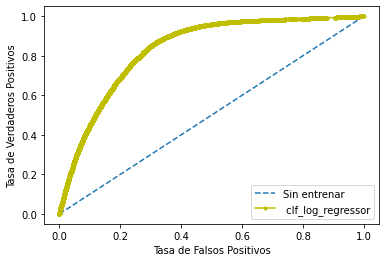

In [69]:
#Generamos un clasificador sin entrenar , que asignará 0 a todo
sin_entrenar = [0 for _ in range(len(X_test))]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, sin_entrenar)
lr_auc = roc_auc_score(y_test, clf_log_regressor.predict_proba(X_test)[:, 1])
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, sin_entrenar)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clf_log_regressor.predict_proba(X_test)[:, 1])
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clf_log_regressor' , color = "y")
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

 ## *** Conclusiones Modelo ***

- __Las principales metricas elegidas__ en el Modelo de clasificacion Logistic Regression  para decidir si estamos ante un buen resultado es __Metrica Recall y AUC - Curva Roc.__ 
- Iniciamos nuestro modelo con una __primera aproximacion__ obteniendo unos resultados __muy mejorables. Recall 0,02.__ La base de datos utilizada es la original sin haber realizado ningun preprocesado. 
- Continuamos evolucionando nuestro modelo. Utilizamos dos bases de datos para comparar resultados.  Bases de datos ya preprocesadas en nuestro bloque de preprocessing. DF_normalizado donde hemos adaptado, aplicado Label Encoder, Standar Scaler y  Normalizado variables. (df_normalizado).  La segunda Base de datos utilizada es df_normalizado a la que hemos aplicado PCA reduciendo dimensionalidad.
- __Confirmamos que nuestro set de entramiento ha generalizado bien al no haber mucha diferencia entre los resultados obtenidos de Test y Train. Podemos descartar overfiting__ lo hemos comprobado mediante Cross Validation obteniendo medias de distintas metricas.

- Dado que nuestro __Target esta muy desbalanceado__ a razon de 87% (No) y 13% (Si), en el entremaniemto del modelo se han utilizado _3 formas distintas de tratamiento del balanceo__. Class Weigth , Nearmiss y Smote. Despues de entrenar las tres posibilidades __nos quedamos finalmente con Class Weigth.__
- Tambien desechamos el modelo estudiado con PCA al haber obenitdo metricas casi identicas que sin haber utiliado PCA. Considero que el modelo se explica mejor con las variables originales.
- __Las metricas finales son :  Recall 0.887 - Auc 0.835__
- Por ultimo, confirmar todo lo anteriormente expuesto con el estudio de la matriz de confusion. Obtenemos unos resultados de Falsos negativos 1272  y verdaderos negativos 10014.  En nuestro modelo prima la deteccion de clientes que no van a contratar el seguro. Detectando aquellos clientes que no son susceptibles de tener el seguro de hogar podemos trabajar con aquellos que si pueden tenerlo. Todo ello con un objetivo de optimizacion del tiempo y eficiencia comercial.
- Se echan en falta, entre otras muchas, variables y datos como la renta de los clientes, hijos, tipo de trabajo,   nomina real en euros obtenida, lugar de residencia...etc.